<a href="https://colab.research.google.com/github/Sairaj-97/Machine-Learning/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np


Linear Regression:

Y = wX + b

Y --> Dependent Variable

X --> Independent Variable

w --> weight

b --> bias

Gradient Descent:

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w = w - α*dw

b = b - α*db

Learning Rate:

Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.



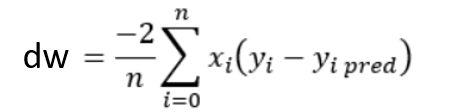

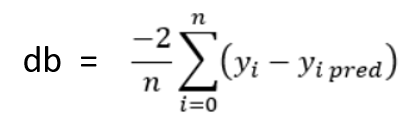

In [29]:
class LinearRegression:
  def __init__(self,learning_rate,no_of_iterations):
    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations

  def fit(self,X,Y):
    self.X=X
    self.Y=Y
    #m has num of data points and n has num of features
    self.m,self.n = X.shape
    self.w=np.zeros(self.n)
    self.b=0

    for i in range(self.no_of_iterations):
      self.updateWeights()


  def updateWeights(self):
    Y_prediction = self.predict(self.X)
    #calculating gradients
    dw = - (2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m
    db = - 2 * np.sum(self.Y - Y_prediction)/self.m

    #updating weights
    self.w=self.w-self.learning_rate*dw
    self.b=self.b-self.learning_rate*db

  def predict(self,X):
    return X.dot(self.w)+self.b



Testing the class we made with a small sample datset(Salary vs Work exp)

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [31]:
dataset = pd.read_csv('/content/salary_data.csv')
dataset.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [32]:
#splitting feature variables and target(X and Y)
X=dataset.iloc[:,:-1].values
Y=dataset.iloc[:,1].values

In [33]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [34]:
model=LinearRegression(learning_rate=0.02,no_of_iterations=1000)

training the model

In [35]:
model.fit(X_train,Y_train)


we got the optimal values for w and b

In [37]:
print(model.w[0])
print(model.b)

#prediction
y_predict=model.predict(X_test)

9570.888860991548
24384.029598697263


visualization of the results

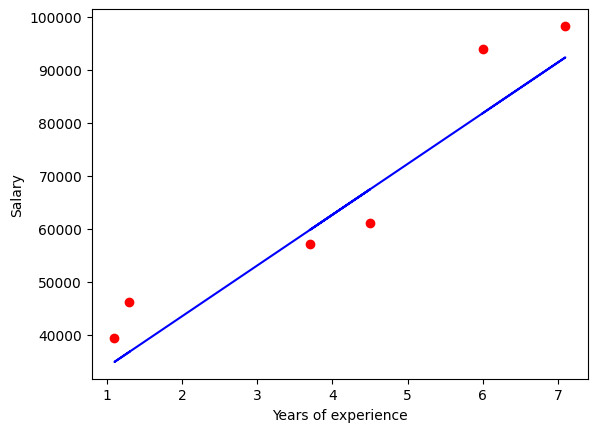

In [38]:
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_test,y_predict,color='blue')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.show()
